# Machine Learning - Assignment

## Base

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('../data.csv', sep='|', dtype={'client_id': str})
data.shape

(238616, 77)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238616 entries, 0 to 238615
Data columns (total 77 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   client_id                                      238616 non-null  object 
 1   Target                                         238615 non-null  float64
 2   Month                                          238615 non-null  object 
 3   First_product_dt                               238615 non-null  object 
 4   Last_product_dt                                238615 non-null  object 
 5   CreditCard_Premium                             238615 non-null  object 
 6   CreditCard_Active                              238615 non-null  object 
 7   CreditCard_CoBranding                          238615 non-null  object 
 8   Loan_Active                                    238615 non-null  object 
 9   Mortgage_Active                      

In [3]:
data

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,Yes,Yes,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238611,6377583,0.0,2019-04-01,2015-06-03,2019-01-04,No,Yes,No,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,BUENOS AIRES,J55660104XX012
238612,6412619,0.0,2019-01-01,2015-07-08,2018-06-02,No,No,No,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
238613,5542402,0.0,2019-04-01,2012-09-13,2012-09-13,No,Yes,No,No,No,...,0.0,0.0,0.0,1.0,0.0,0.0,No,Yes,REGION NORTE GRANDE ARGENTINO,J55660104XX012
238614,5921880,0.0,2019-03-01,2014-01-30,2017-05-24,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,CABA Centro/Norte,NaN


In [4]:
data_9m = pd.DataFrame(data.client_id.value_counts().reset_index())
data_9m.columns = ['client_id', 'q_months']

In [5]:
data_9m = data_9m[data_9m.q_months == 9].copy()

In [6]:
data.Package_Active.value_counts()

Package_Active
No     234177
Yes      4438
Name: count, dtype: int64

In [7]:
data_no_package = data[(data.Package_Active == 'No') & (data.Month == '2019-01-01')][['client_id']]

In [8]:
data.Target.value_counts()

Target
0.0    176359
1.0     62256
Name: count, dtype: int64

In [9]:
data_target = data[(data.Target == 1) & (data.Month.isin(['2019-04-01', '2019-03-01']))][
    ['client_id']].drop_duplicates()

In [10]:
data_target['TGT'] = 1

### Business Condition

In [11]:
data_cobranding = data[(data.CreditCard_CoBranding == 'Yes') & (data.Month == '2019-01-01')][['client_id']]
data_cobranding.shape

(2843, 1)

In [12]:
data_cross_cobranding = data_cobranding.merge(data_target, how='left', on='client_id').fillna(0)
data_cross_cobranding.TGT.value_counts()

TGT
0.0    2836
1.0       7
Name: count, dtype: int64

Filter clients by:
- 9 months with Data
- No Co Branding
- No Active Package

In [13]:
data_cobranding_no = data[(data.CreditCard_CoBranding == 'No') & (data.Month == '2019-01-01')][['client_id']]

In [14]:
universe = data_9m \
    .merge(data_no_package, how='inner', on='client_id') \
    .merge(data_cobranding_no, how='inner', on='client_id') \
    .merge(data_target, how='left', on='client_id').fillna(0)

universe.TGT.value_counts()

TGT
0.0    16368
1.0     6823
Name: count, dtype: int64

In [15]:
universe

,client_id,q_months,TGT
0,5856970,9,1.0
1,5895899,9,0.0
2,4712252,9,0.0
3,6657428,9,0.0
4,6604065,9,0.0
...,...,...,...
23186,5489595,9,1.0
23187,4205458,9,1.0
23188,2964835,9,0.0
23189,6350133,9,1.0


# EDA

In [16]:
training_window = data[(data.Month.isin(['2018-08-01',
                                         '2018-09-01',
                                         '2018-10-01',
                                         '2018-11-01',
                                         '2018-12-01',
                                         '2019-01-01'
                                         ]))]
# training_window = training_window.merge(universe, how='inner', on='client_id')

In [17]:
training_window.drop_duplicates('client_id', inplace=False)[['Client_Age_grp']]

,Client_Age_grp
0,Mayor a 70 años
1,Entre 50 y 59 años
2,Entre 30 y 39 años
3,Mayor a 70 años
4,Entre 40 y 49 años
...,...
179769,Entre 30 y 39 años
181040,Entre 30 y 39 años
188223,Entre 50 y 59 años
190187,Entre 30 y 39 años


In [18]:
import numpy as np

training_window.loc[:, 'SavingAccount_Balance_Average'] = np.where(
    training_window.SavingAccount_Balance_Average.isnull(),
    training_window.SavingAccount_Balance_FirstDate - training_window.SavingAccount_Debits_Amounts + training_window.SavingAccount_Credits_Amounts,
    training_window.SavingAccount_Balance_Average)

## Understanding variables

Selected columns:

```
client_id
Client_Age_grp
Sex
Region
Target
CreditCard_Product
CreditCard_Premium
CreditCard_Active
Loan_Active
Mortgage_Active
Investment_Active
SavingAccount_Active_DOLLAR
SavingAccount_Balance_FirstDate
SavingAccount_Balance_LastDate
SavingAccount_Balance_Average
SavingAccount_Days_with_use
SavingAccount_Days_with_Credits
SavingAccount_Days_with_Debits
SavingAccount_Transactions_Transactions
SavingAccount_Credits_Amounts
SavingAccount_Debits_Amounts
SavingAccount_DebitCard_Spend_Amount
SavingAccount_Salary_Payment_Amount
Operations_Bank
Operations_HomeBanking
Operations_Mobile
CreditCard_Total_Limit
CreditCard_Total_Spending
CreditCard_Revolving
CreditCard_Spending_1_Installment
CreditCard_Spending_Installments
```

In [19]:
len(training_window['client_id'].unique())

26509

In [20]:
training_window.drop_duplicates('client_id', inplace=False, keep='last')[['Client_Age_grp']].value_counts(dropna=False)

Client_Age_grp    
Entre 40 y 49 años    7160
Entre 30 y 39 años    6411
Entre 50 y 59 años    5807
Entre 60 y 64 años    2370
Entre 65 y 69 años    1899
Entre 18 y 29 años    1452
Mayor a 70 años       1409
Menor a 18 años          1
Name: count, dtype: int64

In [21]:
training_window.drop_duplicates('client_id', inplace=False, keep='last')[['Sex']].value_counts(dropna=False)

Sex
M      15112
F      11397
Name: count, dtype: int64

In [22]:
regions = data[['client_id', 'Month', 'Region']]
regions.isnull().sum()

client_id         0
Month             1
Region       185536
dtype: int64

### Missing values
There is only one **null** month.

In [23]:
null_month = regions[regions.Month.isnull()]
print(null_month)

                     client_id Month Region
238615  (238615 rows affected)   NaN    NaN


Inspecting that row, we can discard it.

In [24]:
regions = regions[~regions.Month.isnull()]
print(
    f"Clients: {len(regions['client_id'].unique())} - Clients in training window: {len(training_window['client_id'].unique())}")
regions.head()

Clients: 26560 - Clients in training window: 26509


,client_id,Month,Region
0,5856970,2018-10-01,NaN
1,6371753,2018-09-01,NaN
2,5928737,2019-01-01,NaN
3,475064,2018-12-01,NaN
4,3615172,2018-09-01,NaN


In [25]:
# Check month consistency
regions['Month'] = pd.to_datetime(regions['Month'])
regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238615 entries, 0 to 238614
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   client_id  238615 non-null  object        
 1   Month      238615 non-null  datetime64[ns]
 2   Region     53080 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.3+ MB


As `regions` is a copy of `data`, and `training_window` is a subset of `data`. We can say that the months are consistent for all `training_window` entries.


In [26]:
len(training_window[training_window['Month'].isnull()])

0

In [27]:
training_window.loc[:, 'Month'] = pd.to_datetime(training_window['Month'])
training_window = training_window.sort_values('Month')
training_window.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159009 entries, 75992 to 238612
Data columns (total 77 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   client_id                                      159009 non-null  object 
 1   Target                                         159009 non-null  float64
 2   Month                                          159009 non-null  object 
 3   First_product_dt                               159009 non-null  object 
 4   Last_product_dt                                159009 non-null  object 
 5   CreditCard_Premium                             159009 non-null  object 
 6   CreditCard_Active                              159009 non-null  object 
 7   CreditCard_CoBranding                          159009 non-null  object 
 8   Loan_Active                                    159009 non-null  object 
 9   Mortgage_Active                       

In [28]:
previous_count = len(regions['client_id'].unique())
regions = regions.sort_values('Month')
regions = regions[regions['Region'].notnull()]
regions = regions.drop_duplicates(subset=['client_id'], keep='last')
print(regions.info())
print(f"Clients with regions: {len(regions['client_id'].unique())} our of {previous_count}")

<class 'pandas.core.frame.DataFrame'>
Index: 26544 entries, 97487 to 48953
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   client_id  26544 non-null  object        
 1   Month      26544 non-null  datetime64[ns]
 2   Region     26544 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 829.5+ KB
None
Clients with regions: 26544 our of 26560


In [29]:
non_region = training_window[~training_window['client_id'].isin(regions['client_id'])]
print(f"Clients without regions: {len(non_region['client_id'].unique())}")

Clients without regions: 14


In [30]:
# get regions from the data
if 'Region' in training_window.columns:
    training_window.drop('Region', axis=1, inplace=True)
training_window = training_window.merge(regions.drop('Month', axis=1, inplace=False), how='left', on='client_id')
training_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159009 entries, 0 to 159008
Data columns (total 77 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   client_id                                      159009 non-null  object 
 1   Target                                         159009 non-null  float64
 2   Month                                          159009 non-null  object 
 3   First_product_dt                               159009 non-null  object 
 4   Last_product_dt                                159009 non-null  object 
 5   CreditCard_Premium                             159009 non-null  object 
 6   CreditCard_Active                              159009 non-null  object 
 7   CreditCard_CoBranding                          159009 non-null  object 
 8   Loan_Active                                    159009 non-null  object 
 9   Mortgage_Active                      

In [31]:
clients_per_region = training_window.drop_duplicates(subset=['client_id'], inplace=False).value_counts('Region',
                                                                                                       dropna=False)
clients_per_region

Region
BUENOS AIRES                     7138
REGION CENTRO                    5859
REGION NORTE GRANDE ARGENTINO    5053
REGION PATAGONICA                2479
CABA Centro/Norte                2112
REGION CUYO                      1989
AMBA Resto                       1865
NaN                                14
Name: count, dtype: int64

Fill missing values with the most frequent region.

In [32]:
training_window['Region'].value_counts().idxmax()

'BUENOS AIRES'

In [33]:
training_window.fillna({'Region': training_window['Region'].value_counts().idxmax()}, inplace=True)
print(f"Missing Values={training_window['Region'].isna().sum()}")

Missing Values=0


In [34]:
print(training_window['CreditCard_Product'].value_counts())
print(f"Missing Values={training_window['CreditCard_Product'].isnull().sum()}")

Series([], Name: count, dtype: int64)
Missing Values=159009


In [35]:
credit_card_products = data[['client_id', 'Month', 'CreditCard_Product']].copy()

Remove nulls from `CreditCard_Product` and `Month`.

In [36]:
credit_card_products = credit_card_products[credit_card_products['CreditCard_Product'].notnull()]
credit_card_products = credit_card_products[credit_card_products['Month'].notnull()]
credit_card_products['Month'] = pd.to_datetime(credit_card_products['Month'])

Retrieve the product with the date closer to the last month of training window

In [37]:
# Get the last month of training window
last_month = training_window['Month'].max()
print(f"Last month of training window: {last_month}")

Last month of training window: 2019-01-01 00:00:00


In [38]:
# Get the product with the date closer to the last month of training window
credit_card_products = credit_card_products.sort_values('Month')
credit_card_products['delta'] = (last_month - credit_card_products['Month']).dt.days

In [39]:
credit_card_products = credit_card_products.sort_values('delta').drop_duplicates(subset=['client_id'], keep='first')

In [40]:
drop_columns = ['Month', 'delta']
credit_card_products.drop(drop_columns, axis=1, inplace=True)

In [41]:
credit_card_products['CreditCard_Product'].value_counts(dropna=False)

CreditCard_Product
J55660104XX012    8662
J55660202XX012    6027
J55660124XX012    2492
J55660102XX012     417
J55660123XX012     388
J55660702XX012     289
J55661002XX012      71
Name: count, dtype: int64

In [42]:
if 'CreditCard_Product' in training_window.columns:
    training_window.drop('CreditCard_Product', axis=1, inplace=True)
training_window = training_window.merge(credit_card_products, how='left', on='client_id')
training_window.drop_duplicates(subset=['client_id'], keep='last').value_counts('CreditCard_Product', dropna=False)

CreditCard_Product
J55660104XX012    8656
NaN               8191
J55660202XX012    6020
J55660124XX012    2487
J55660102XX012     417
J55660123XX012     380
J55660702XX012     287
J55661002XX012      71
Name: count, dtype: int64

In [43]:
training_window_latest_information = training_window.drop_duplicates(subset=['client_id'], inplace=False, keep='last')
# Missing values
training_window_latest_information[
    ['CreditCard_Premium', 'CreditCard_Active', 'Loan_Active', 'Mortgage_Active']].isnull().sum()

CreditCard_Premium    0
CreditCard_Active     0
Loan_Active           0
Mortgage_Active       0
dtype: int64

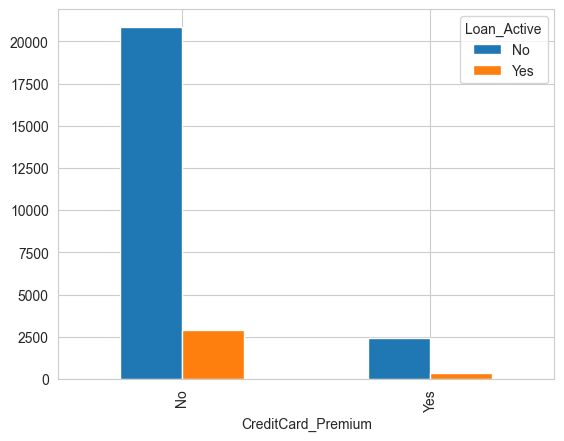

In [44]:
premium_x_loan = pd.crosstab(training_window_latest_information['CreditCard_Premium'],
                             training_window_latest_information['Loan_Active'])
premium_x_loan.plot(kind='bar')
plt.show()

## Chi-Square Test

The chi-square test of independence tests if there is a significant relationship between two categorical variables. The data is usually displayed in a cross-tabulation format with each row representing a category for one variable and each column representing a category for another variable.

Let's say you want to test if there is a relationship between `CreditCard_Premium` and `Loan_Actvie`.

In [45]:
import scipy.stats as stats

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(premium_x_loan)

# Print the results
print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)
print("expected contingency table", expected)

chi2 statistic 0.021561012750987145
p-value 0.8832609262135911
degrees of freedom 1
expected contingency table [[20855.11226376  2903.88773624]
 [ 2413.88773624   336.11226376]]


In this output:

* **chi2 statistic**: This is the calculated chi-square statistic value.
* **p-value**: This helps us to decide whether there is a relationship between the variables. If p-value is small (typically <= 0.05), we can reject the null hypothesis of independence and conclude there is a relationship between the variables.
* **degrees of freedom**: This is calculated based on the number of categories in each variable.
* **expected contingency table**: This is the contingency table that we would expect if the variables were independent of each other.

In [46]:
training_window_latest_information['Mortgage_Active'].value_counts()

Mortgage_Active
No     25978
Yes      531
Name: count, dtype: int64

In [47]:
training_window_latest_information['CreditCard_Active'].value_counts()

CreditCard_Active
Yes    18275
No      8234
Name: count, dtype: int64

In [48]:
training_window_latest_information['SavingAccount_Active_DOLLAR'].value_counts(dropna=False)

SavingAccount_Active_DOLLAR
No     14138
Yes    12371
Name: count, dtype: int64

In [49]:
training_window['SavingAccount_Days_with_use'].isna().sum()

0

In [50]:
training_window['SavingAccount_Days_with_use'].describe()

count    159009.000000
mean          2.326070
std           3.754833
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          41.000000
Name: SavingAccount_Days_with_use, dtype: float64

In [51]:
training_window[['SavingAccount_Days_with_use', 'Month']].groupby('Month').agg(
    mean_use=('SavingAccount_Days_with_use', 'mean'),
    std_use=('SavingAccount_Days_with_use', 'std'),
    median_use=('SavingAccount_Days_with_use', 'median'),
    max=('SavingAccount_Days_with_use', 'max')
)

,mean_use,std_use,median_use,max
Month,,,,
2018-08-01,2.308882,3.797383,0.0,41.0
2018-09-01,2.189389,3.487511,0.0,30.0
2018-10-01,2.395608,3.886136,0.0,39.0
2018-11-01,2.205049,3.502591,0.0,35.0
2018-12-01,2.373458,3.721031,0.0,32.0
2019-01-01,2.484021,4.090272,0.0,38.0


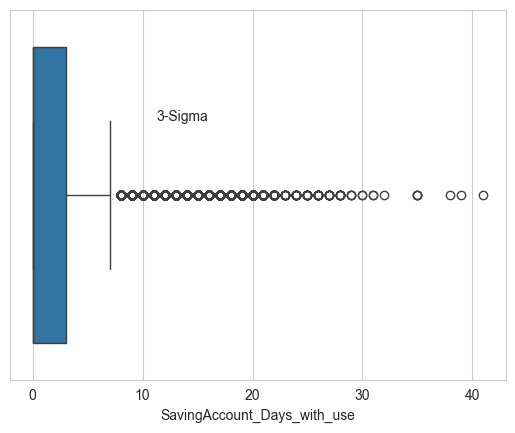

In [52]:
sns.boxplot(data=training_window, x='SavingAccount_Days_with_use')
plt.text(x=3 * training_window['SavingAccount_Days_with_use'].std(), y=-0.2, s='3-Sigma')
plt.show()

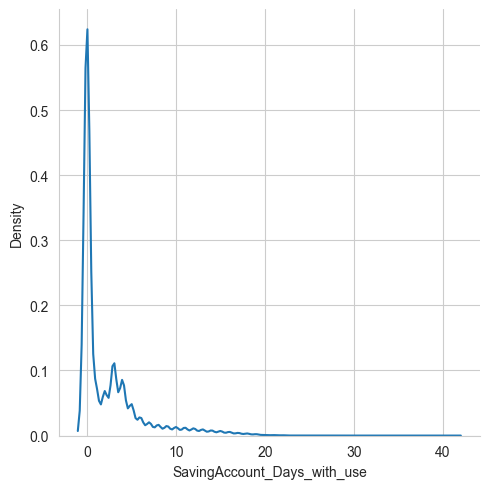

In [53]:
sns.displot(data=training_window['SavingAccount_Days_with_use'], kind='kde')
plt.show()

In [54]:
training_window['SavingAccount_Days_with_use'].describe()

count    159009.000000
mean          2.326070
std           3.754833
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          41.000000
Name: SavingAccount_Days_with_use, dtype: float64

In [55]:
training_window[['SavingAccount_Days_with_Credits', 'SavingAccount_Days_with_Debits']].describe()

,SavingAccount_Days_with_Credits,SavingAccount_Days_with_Debits
count,159009.000000,159009.000000
mean,1.158287,1.717274
std,1.760864,3.167589
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,30.000000,36.000000


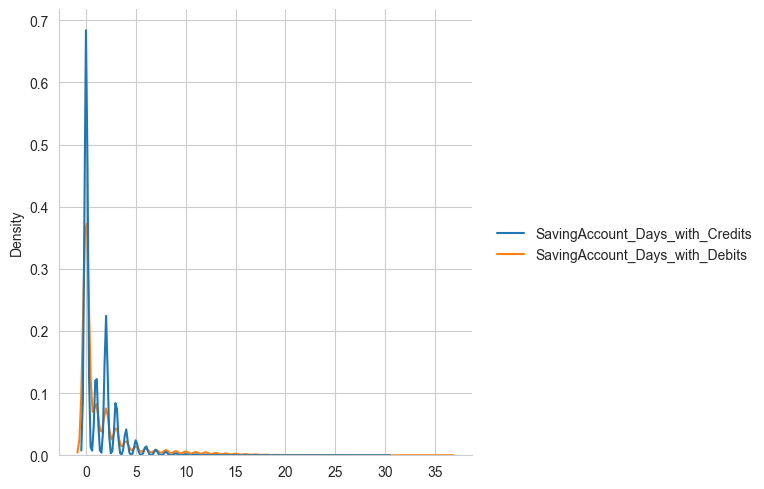

In [56]:
sns.displot(data=training_window[['SavingAccount_Days_with_Credits', 'SavingAccount_Days_with_Debits']], kind='kde')
plt.show()

In [57]:
training_window[['SavingAccount_Credits_Amounts', 'SavingAccount_Debits_Amounts']].isna().sum()

SavingAccount_Credits_Amounts    0
SavingAccount_Debits_Amounts     0
dtype: int64

In [58]:
training_window[['SavingAccount_Credits_Amounts', 'SavingAccount_Debits_Amounts']].describe()

,SavingAccount_Credits_Amounts,SavingAccount_Debits_Amounts
count,1.590090e+05,1.590090e+05
mean,1.478460e+04,1.472050e+04
std,8.937540e+04,8.899189e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,6.000630e+03,6.241180e+03
max,6.469145e+06,6.240007e+06


In [59]:
training_window[['SavingAccount_Credits_Amounts', 'Month']].groupby('Month').agg(
    mean_amount=('SavingAccount_Credits_Amounts', 'mean'),
    std_amount=('SavingAccount_Credits_Amounts', 'std'),
    median_amount=('SavingAccount_Credits_Amounts', 'median'),
    max=('SavingAccount_Credits_Amounts', 'max')
)

,mean_amount,std_amount,median_amount,max
Month,,,,
2018-08-01,14309.032971,83892.233338,0.0,4023083.23
2018-09-01,13392.702331,84696.707687,0.0,4662997.28
2018-10-01,14544.200574,86091.123420,0.0,3927000.00
2018-11-01,13641.826536,80312.967328,0.0,4850598.47
2018-12-01,16456.518208,96944.220081,0.0,6469145.04
2019-01-01,16363.202016,102219.576598,0.0,4417988.58


In [60]:
training_window[['SavingAccount_Debits_Amounts', 'Month']].groupby('Month').agg(
    mean_amount=('SavingAccount_Debits_Amounts', 'mean'),
    std_amount=('SavingAccount_Debits_Amounts', 'std'),
    median_amount=('SavingAccount_Debits_Amounts', 'median'),
    max=('SavingAccount_Debits_Amounts', 'max')
)

,mean_amount,std_amount,median_amount,max
Month,,,,
2018-08-01,14170.025528,83869.213523,0.0,4024409.05
2018-09-01,13683.615262,84891.290462,0.0,4652429.35
2018-10-01,14659.241007,85129.155050,0.0,3927080.80
2018-11-01,13555.910965,79212.363779,0.0,4827661.51
2018-12-01,15534.074749,96993.380198,0.0,6240006.95
2019-01-01,16719.998962,101692.803595,0.0,4417880.49


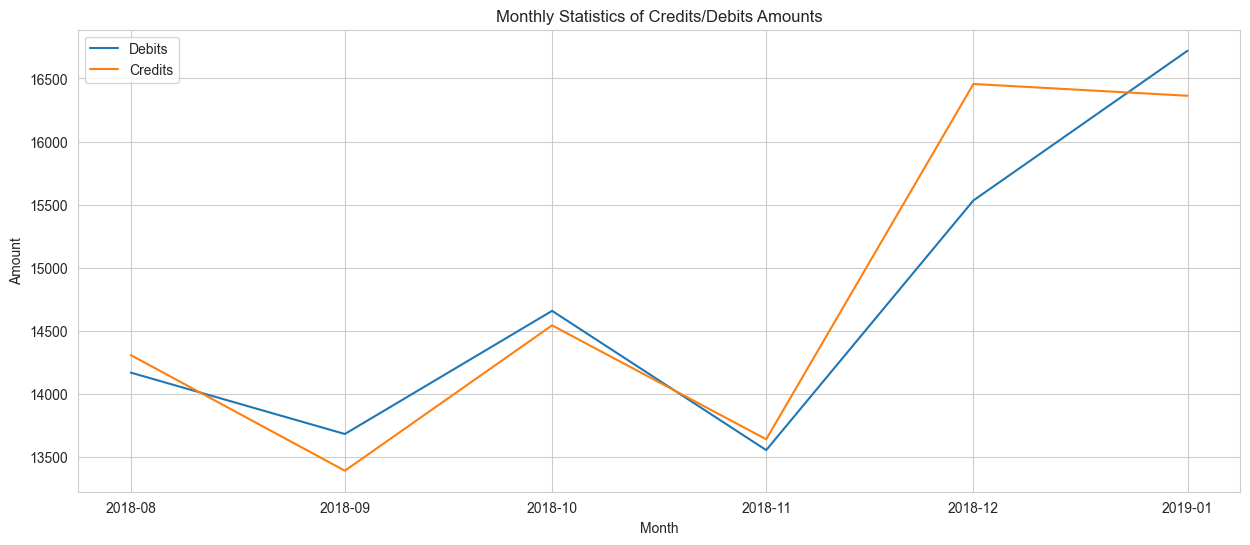

In [61]:
df_agg = training_window[['SavingAccount_Debits_Amounts', 'SavingAccount_Credits_Amounts', 'Month']].groupby(
    'Month').agg(
    mean_debits=('SavingAccount_Debits_Amounts', 'mean'),
    mean_credits=('SavingAccount_Credits_Amounts', 'mean'),
)

plt.figure(figsize=(15, 6))
plt.plot(df_agg.index, df_agg['mean_debits'], label='Debits')
plt.plot(df_agg.index, df_agg['mean_credits'], label='Credits')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Statistics of Credits/Debits Amounts')
plt.legend()
plt.show()

In [62]:
training_window[['Operations_Bank', 'Operations_HomeBanking', 'Operations_Mobile']].isna().sum()

Operations_Bank           0
Operations_HomeBanking    0
Operations_Mobile         0
dtype: int64

In [63]:
training_window[['Operations_Bank', 'Operations_HomeBanking', 'Operations_Mobile']].describe()

,Operations_Bank,Operations_HomeBanking,Operations_Mobile
count,159009.000000,159009.000000,159009.000000
mean,0.121125,1.178361,0.644492
std,0.460034,2.895774,2.527516
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,19.000000,30.000000,30.000000


In [64]:
training_window['most_used_operation'] = training_window[
    ['Operations_Bank', 'Operations_HomeBanking', 'Operations_Mobile']].idxmax(axis=1)
training_window['most_used_operation'] = training_window['most_used_operation'].replace({
    'Operations_Bank': 'Bank',
    'Operations_HomeBanking': 'HomeBanking',
    'Operations_Mobile': 'Mobile'
})
training_window['most_used_operation'].value_counts()

most_used_operation
Bank           107619
HomeBanking     39371
Mobile          12019
Name: count, dtype: int64

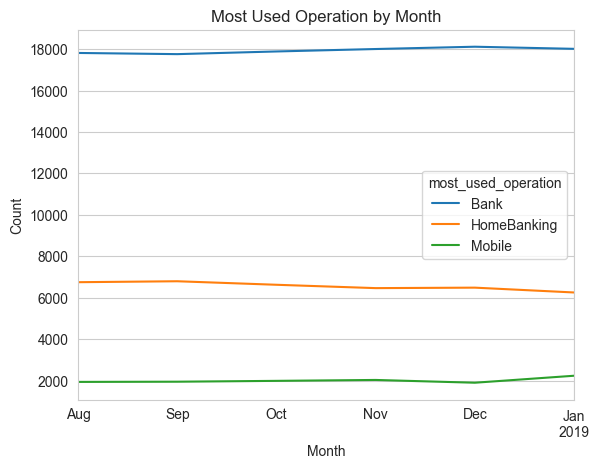

In [65]:
pivot_data = training_window.groupby(['Month', 'most_used_operation']).size().unstack(fill_value=0)

# Plot
pivot_data.plot(kind='line')
plt.title('Most Used Operation by Month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

In [66]:
operations_to_sum = ['Operations_Bank', 'Operations_Terminal', 'Operations_HomeBanking',
                     'Operations_Mobile', 'Operations_Ivr', 'Operations_Telemarketer', 'Operations_ATM']
training_window['Operations_Total'] = training_window[operations_to_sum].sum(axis=1)

In [67]:
training_window['CreditCard_Total_Spending'].describe()

count    159009.000000
mean       4144.860517
std        7048.204420
min      -30164.770000
25%           0.000000
50%        1626.330000
75%        5503.920000
max      176554.250000
Name: CreditCard_Total_Spending, dtype: float64

In [68]:
training_window[['CreditCard_Total_Spending', 'CreditCard_Active']].isnull().sum()

CreditCard_Total_Spending    0
CreditCard_Active            0
dtype: int64

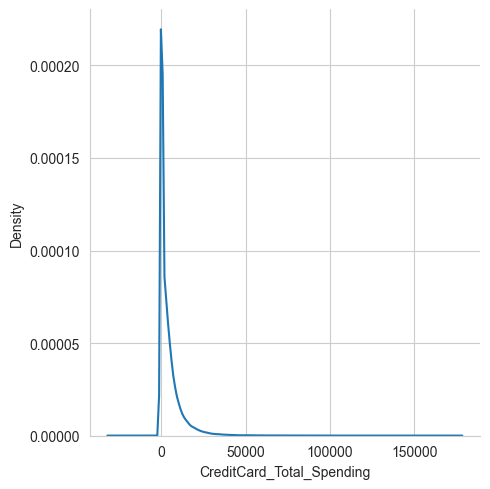

In [69]:
sns.displot(training_window['CreditCard_Total_Spending'], kind='kde')

plt.show()

In [70]:
training_window['CreditCard_Active'].value_counts()

CreditCard_Active
Yes    109722
No      49287
Name: count, dtype: int64

In [71]:
training_window['CreditCard_Total_Spending'].describe()

count    159009.000000
mean       4144.860517
std        7048.204420
min      -30164.770000
25%           0.000000
50%        1626.330000
75%        5503.920000
max      176554.250000
Name: CreditCard_Total_Spending, dtype: float64

In [72]:
training_window[training_window['CreditCard_Total_Spending'] < 0][['CreditCard_Total_Spending']].describe()

,CreditCard_Total_Spending
count,84.000000
mean,-2845.617619
std,6099.293187
min,-30164.770000
25%,-1652.802500
50%,-461.000000
75%,-199.000000
max,-1.770000


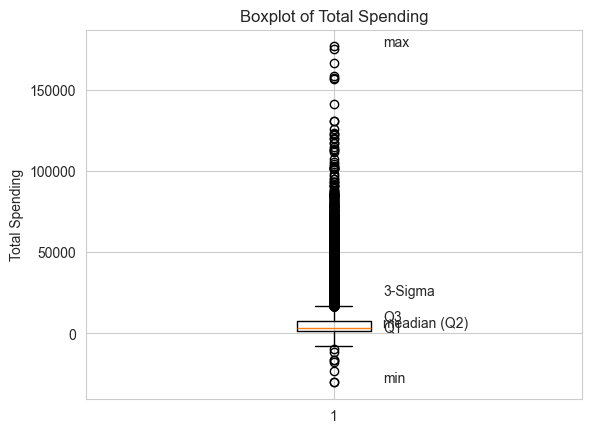

In [73]:
training_window_with_credit_card = training_window[training_window['CreditCard_Active'] == 'Yes']
plt.boxplot(training_window_with_credit_card['CreditCard_Total_Spending'])

# add labels for five number summary
plt.text(x=1.1, y=training_window_with_credit_card['CreditCard_Total_Spending'].min(), s='min')
plt.text(x=1.1, y=training_window_with_credit_card['CreditCard_Total_Spending'].quantile(0.25), s='Q1')
plt.text(x=1.1, y=training_window_with_credit_card['CreditCard_Total_Spending'].median(), s='meadian (Q2)')
plt.text(x=1.1, y=training_window_with_credit_card['CreditCard_Total_Spending'].quantile(0.75), s='Q3')
plt.text(x=1.1, y=3 * training_window_with_credit_card['CreditCard_Total_Spending'].std(), s='3-Sigma')
plt.text(x=1.1, y=training_window_with_credit_card['CreditCard_Total_Spending'].max(), s='max')

# add the graph title and axes labels
plt.title('Boxplot of Total Spending')
plt.ylabel('Total Spending')

plt.show()

In [74]:
training_window_with_credit_card['CreditCard_Total_Spending'].describe()

count    109722.000000
mean       5912.903570
std        7808.862882
min      -30164.770000
25%        1286.942500
50%        3618.675000
75%        7606.962500
max      176554.250000
Name: CreditCard_Total_Spending, dtype: float64

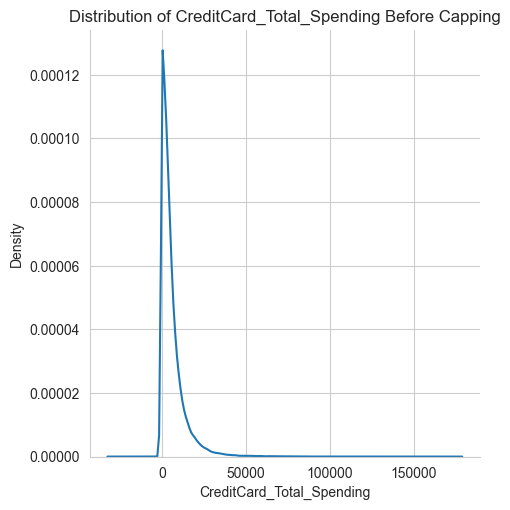

In [75]:
sns.displot(training_window_with_credit_card['CreditCard_Total_Spending'], kind='kde')
plt.title('Distribution of CreditCard_Total_Spending Before Capping')
plt.show()

In [76]:
p95 = training_window_with_credit_card['CreditCard_Total_Spending'].quantile(0.95)
p99 = training_window_with_credit_card['CreditCard_Total_Spending'].quantile(0.99)
three_sigma = 3 * training_window_with_credit_card['CreditCard_Total_Spending'].std()

print('p95         ', p95)
print('p99         ', p99)
print('Three sigma ', three_sigma)

p95          19623.3755
p99          36347.66319999997
Three sigma  23426.588646255605


In [77]:
df = training_window_with_credit_card.copy()

df['CreditCard_Total_Spending'] = np.where(
    training_window_with_credit_card['CreditCard_Total_Spending'] > p95,
    p95,
    training_window_with_credit_card['CreditCard_Total_Spending'])

df.describe()

,Target,SavingAccount_Balance_FirstDate,SavingAccount_Balance_LastDate,SavingAccount_Balance_Average,SavingAccount_Days_with_use,SavingAccount_Days_with_Credits,SavingAccount_Days_with_Debits,SavingAccount_Salary_Payment_Transactions,SavingAccount_Transfer_In_Transactions,SavingAccount_ATM_Extraction_Transactions,...,CreditCard_Spending_Aut_Debits,CreditCard_Revolving,CreditCard_Payment_Aut_Debit,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Operations_Total
count,109722.000000,1.097220e+05,1.097220e+05,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,...,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000,109722.000000
mean,0.349912,4.146408e+03,4.101622e+03,3719.018318,2.280272,1.123175,1.720895,0.122665,0.316600,0.453419,...,1476.634752,2609.962326,0.282578,0.252219,0.034761,0.181659,0.064527,0.127759,0.059842,2.995835
std,0.476944,2.617210e+04,2.349813e+04,18990.506005,3.887394,1.828205,3.288013,0.521239,0.980836,2.015607,...,2922.104903,8466.577394,0.560871,0.494574,0.195310,0.453537,0.290716,0.395252,0.392406,4.983906
min,0.000000,0.000000e+00,0.000000e+00,-566.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9476.360000,-249630.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.947425e+02,2.159800e+02,1016.825000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,1739.000000,415.972500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,2.693271e+06,2.410284e+06,966593.730000,41.000000,30.000000,36.000000,11.000000,44.000000,59.000000,...,54622.210000,122252.230000,6.000000,7.000000,6.000000,7.000000,8.000000,9.000000,24.000000,56.000000


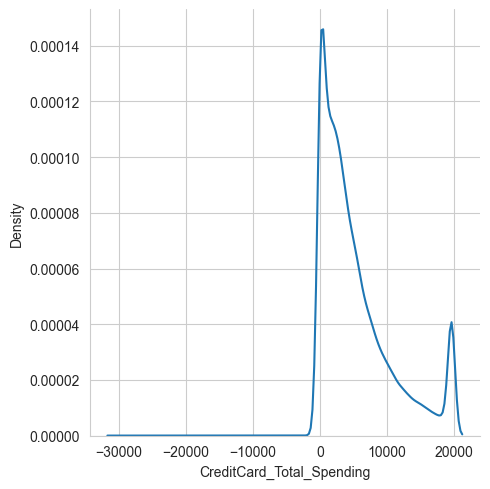

In [78]:
sns.displot(df['CreditCard_Total_Spending'], kind='kde')

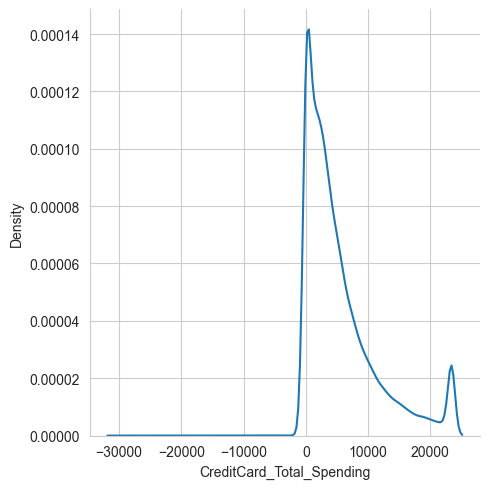

In [79]:
df['CreditCard_Total_Spending'] = np.where(
    training_window_with_credit_card['CreditCard_Total_Spending'] > three_sigma,
    three_sigma,
    training_window_with_credit_card['CreditCard_Total_Spending'])

sns.displot(df['CreditCard_Total_Spending'], kind='kde')

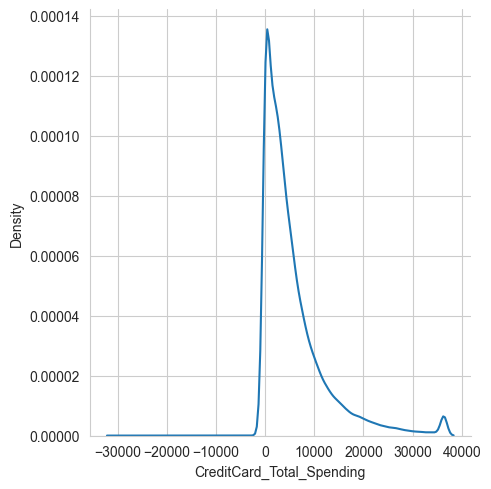

In [80]:
df['CreditCard_Total_Spending'] = np.where(
    training_window_with_credit_card['CreditCard_Total_Spending'] > p99,
    p99,
    training_window_with_credit_card['CreditCard_Total_Spending'])

sns.displot(df['CreditCard_Total_Spending'], kind='kde')

In [81]:
training_window['CreditCard_Spending_1_Installment'].describe()

count    159009.000000
mean       1324.317224
std        4157.733080
min      -74880.000000
25%           0.000000
50%           0.000000
75%         601.210000
max      176554.250000
Name: CreditCard_Spending_1_Installment, dtype: float64

In [82]:
training_window['Month'] = pd.to_datetime(training_window['Month'])
indexed_tx = training_window.set_index('Month')

client_monthly_data = training_window.groupby(['Month'])[
    'CreditCard_Spending_1_Installment'].agg(['sum', 'mean', 'min', 'max'])
# Reset the index of the DataFrame
client_monthly_data.reset_index(inplace=True)
client_monthly_data.head()

,Month,sum,mean,min,max
0,2018-08-01,34195305.84,1290.291519,-52000.00,176554.25
1,2018-09-01,28811594.48,1087.188954,-31111.00,78270.00
2,2018-10-01,38053389.44,1435.922774,-74880.00,166545.14
3,2018-11-01,33727538.44,1272.689274,-53000.00,75784.17
4,2018-12-01,35140083.45,1325.990848,-43874.89,148095.07


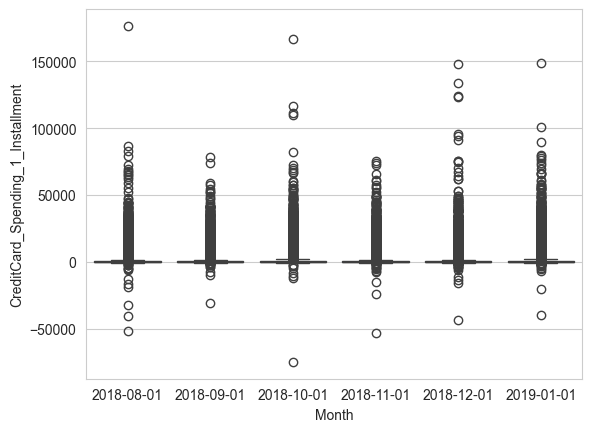

In [83]:
sns.boxplot(data=training_window, x='Month', y='CreditCard_Spending_1_Installment')
plt.show()

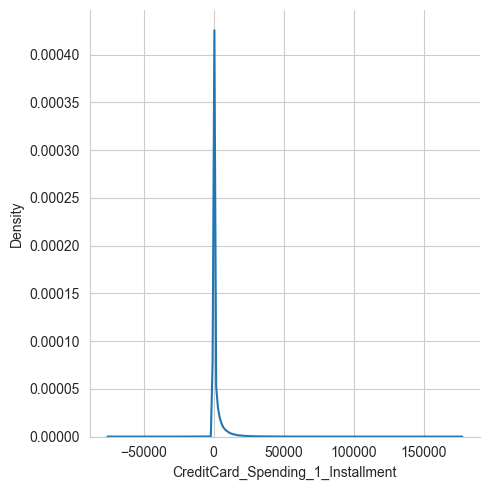

In [84]:
sns.displot(data=training_window['CreditCard_Spending_1_Installment'], kind='kde')
plt.show()

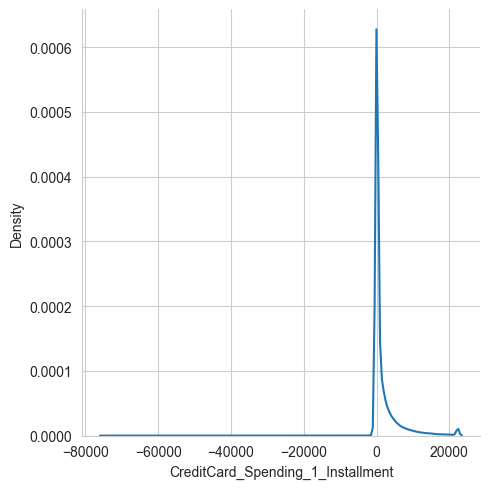

In [85]:
p99 = training_window_with_credit_card['CreditCard_Spending_1_Installment'].quantile(0.99)
df['CreditCard_Spending_1_Installment'] = np.where(
    training_window_with_credit_card['CreditCard_Spending_1_Installment'] > p99,
    p99,
    training_window_with_credit_card['CreditCard_Spending_1_Installment'])

sns.displot(df['CreditCard_Spending_1_Installment'], kind='kde')
plt.show()

In [86]:
training_window['First_product_dt'] = pd.to_datetime(training_window['First_product_dt'])
training_window['Last_product_dt'] = pd.to_datetime(training_window['Last_product_dt'])
categories = ['Client_Age_grp', 'Sex', 'Region', 'CreditCard_Product']
training_window['CreditCard_Product'] = training_window['CreditCard_Product'].astype('category')

In [87]:
abt = training_window.groupby(['client_id']).agg(
    {
        'Client_Age_grp': 'last',
        'Sex': 'last',
        'Region': 'last',
        'CreditCard_Product': 'last',
        'First_product_dt': 'last',
        'Last_product_dt': 'last',
        'Operations_Total': 'sum',
        'SavingAccount_DebitCard_Spend_Amount': ['sum', 'mean', 'min', 'max'],
        'SavingAccount_Balance_Average': ['sum', 'mean', 'min', 'max'],
        'CreditCard_Total_Spending': ['sum', 'mean', 'min', 'max'],
        'CreditCard_Spending_1_Installment': ['sum', 'mean', 'min', 'max'],
        'CreditCard_Spending_Installments': ['sum', 'mean', 'min', 'max'],
    }
)

In [88]:
abt

Client_Age_grp  Sex             Region CreditCard_Product  \
                         last last               last               last   
client_id                                                                  
1000199    Entre 40 y 49 años    M       BUENOS AIRES                NaN   
1000245    Entre 40 y 49 años    F      REGION CENTRO                NaN   
1000847    Entre 40 y 49 años    F  REGION PATAGONICA                NaN   
1001232    Entre 40 y 49 años    M       BUENOS AIRES     J55660104XX012   
1001450    Entre 40 y 49 años    F       BUENOS AIRES     J55660104XX012   
...                       ...  ...                ...                ...   
99842      Entre 65 y 69 años    M        REGION CUYO     J55660202XX012   
998420     Entre 40 y 49 años    F      REGION CENTRO     J55660202XX012   
998768     Entre 40 y 49 años    M        REGION CUYO     J55660104XX012   
99926         Mayor a 70 años    M        REGION CUYO     J55660104XX012   
999462     Entre 40 y 49 años    M      REGION CENTRO                NaN   

          First_product_dt Last_product_dt Operations_Total  \
                      last            last              sum   
client_id                                                     
1000199         2017-02-21      2017-05-18             34.0   
1000245         2013-04-15      2017-04-22              3.0   
1000847         2017-01-31      2017-04-29              0.0   
1001232         2006-09-19      2006-09-19              0.0   
1001450         2017-04-16      2017-05-23             68.0   
...                    ...             ...              ...   
99842           2004-07-30      2017-12-30            133.0   
998420          2009-12-11      2019-01-31             46.0   
998768          2014-07-29      2017-05-18              1.0   
99926           2004-10-14      2005-01-07              0.0   
999462          2016-03-08      2017-05-18              2.0   

          SavingAccount_DebitCard_Spend_Amount                         ...  \
                                           sum          mean      min  ...   
client_id                                                              ...   
1000199                                   0.00      0.000000     0.00  ...   
1000245                                   0.00      0.000000     0.00  ...   
1000847                                   0.00      0.000000     0.00  ...   
1001232                                   0.00      0.000000     0.00  ...   
1001450                                   0.00      0.000000     0.00  ...   
...                                        ...           ...      ...  ...   
99842                                 85053.91  14175.651667  9709.98  ...   
998420                                 8032.02   1338.670000   335.48  ...   
998768                                    0.00      0.000000     0.00  ...   
99926                                     0.00      0.000000     0.00  ...   
999462                                    0.00      0.000000     0.00  ...   

          CreditCard_Total_Spending            \
                                min       max   
client_id                                       
1000199                      790.00  14561.03   
1000245                        0.00      0.00   
1000847                        0.00      0.00   
1001232                     3255.29   5509.04   
1001450                        0.00   7091.30   
...                             ...       ...   
99842                       5537.43   8213.75   
998420                      8485.55  15789.69   
998768                         0.00      0.00   
99926                       8035.08  12536.05   
999462                         0.00      0.00   

          CreditCard_Spending_1_Installment                                \
                                        sum         mean    min       max   
client_id                                                                   
1000199                            35672.20  5945.366667

In [89]:
abt.dtypes

Client_Age_grp                        last            object
Sex                                   last            object
Region                                last            object
CreditCard_Product                    last          category
First_product_dt                      last    datetime64[ns]
Last_product_dt                       last    datetime64[ns]
Operations_Total                      sum            float64
SavingAccount_DebitCard_Spend_Amount  sum            float64
                                      mean           float64
                                      min            float64
                                      max            float64
SavingAccount_Balance_Average         sum            float64
                                      mean           float64
                                      min            float64
                                      max            float64
CreditCard_Total_Spending             sum            float64
                        

In [90]:
abt.columns

MultiIndex([(                      'Client_Age_grp', 'last'),
            (                                 'Sex', 'last'),
            (                              'Region', 'last'),
            (                  'CreditCard_Product', 'last'),
            (                    'First_product_dt', 'last'),
            (                     'Last_product_dt', 'last'),
            (                    'Operations_Total',  'sum'),
            ('SavingAccount_DebitCard_Spend_Amount',  'sum'),
            ('SavingAccount_DebitCard_Spend_Amount', 'mean'),
            ('SavingAccount_DebitCard_Spend_Amount',  'min'),
            ('SavingAccount_DebitCard_Spend_Amount',  'max'),
            (       'SavingAccount_Balance_Average',  'sum'),
            (       'SavingAccount_Balance_Average', 'mean'),
            (       'SavingAccount_Balance_Average',  'min'),
            (       'SavingAccount_Balance_Average',  'max'),
            (           'CreditCard_Total_Spending',  'sum'),
        